In [1]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from skimage.io import imread

In [4]:
i = imread('/content/gdrive/MyDrive/data3a/validation/01-minor/0002.JPEG')
i2 = imread('/content/gdrive/MyDrive/data3a/validation/02-moderate/0001.JPEG')
i3 = imread('/content/gdrive/MyDrive/data3a/validation/03-severe/0001.JPEG')

In [5]:
surf = cv2.xfeatures2d.SURF_create(800)


error: ignored

In [6]:
#!pip install opencv-python==3.4.0.14

In [7]:
#### SURF and SIFT no longer open source?

In [8]:
from PIL import Image
from numpy import asarray
numpydata = asarray(i)
numpydata

array([[[174, 149, 119],
        [179, 156, 125],
        [188, 164, 136],
        ...,
        [ 24,  25,   9],
        [ 36,  35,  17],
        [ 36,  35,  17]],

       [[187, 164, 133],
        [184, 160, 132],
        [179, 158, 129],
        ...,
        [ 28,  29,  13],
        [ 38,  37,  19],
        [ 38,  37,  19]],

       [[161, 140, 111],
        [174, 153, 124],
        [193, 173, 146],
        ...,
        [ 28,  31,  14],
        [ 25,  26,   8],
        [ 25,  26,   8]],

       ...,

       [[ 27,  29,  26],
        [ 26,  28,  25],
        [ 26,  28,  25],
        ...,
        [ 54,  52,  39],
        [ 64,  57,  49],
        [ 64,  57,  49]],

       [[ 27,  29,  26],
        [ 26,  28,  25],
        [ 26,  28,  25],
        ...,
        [ 52,  50,  37],
        [ 64,  57,  49],
        [ 64,  57,  49]],

       [[ 27,  29,  26],
        [ 26,  28,  25],
        [ 26,  28,  25],
        ...,
        [ 51,  49,  36],
        [ 63,  56,  48],
        [ 63,  56,  48]]

In [9]:
i = imread('/content/gdrive/MyDrive/data3a/validation/01-minor/0002.JPEG', as_gray=True)
i2 = imread('/content/gdrive/MyDrive/data3a/validation/02-moderate/0001.JPEG', as_gray=True)
i3 = imread('/content/gdrive/MyDrive/data3a/validation/03-severe/0001.JPEG', as_gray=True)

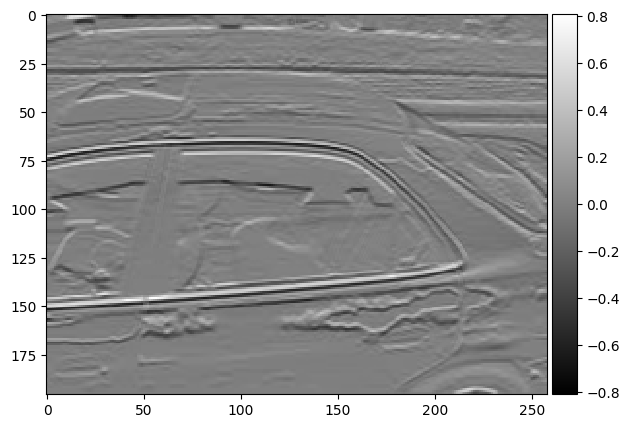

In [10]:

from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v


edges_prewitt = prewitt_h(i)

imshow(edges_prewitt, cmap='gray')

In [11]:
import glob
import cv2
import os
training_minor = []
train_labels_minor = []
for directory_path in glob.glob("/content/gdrive/MyDrive/data3a/training/*"):
    label = directory_path.split("-")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.JPEG")):
        img = imread(img_path, as_gray=True)
        edges_prewitt = prewitt_h(img)
        training_minor.append(edges_prewitt)
        train_labels_minor.append(label)
training_minor = np.array(training_minor)
train_labels_minor = np.array(train_labels_minor)

moderate
severe
minor


<ipython-input-11-07207c96cc73>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training_minor = np.array(training_minor)


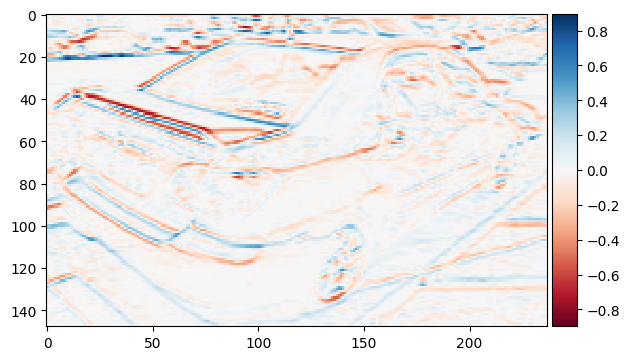

In [12]:
imshow(training_minor[0])

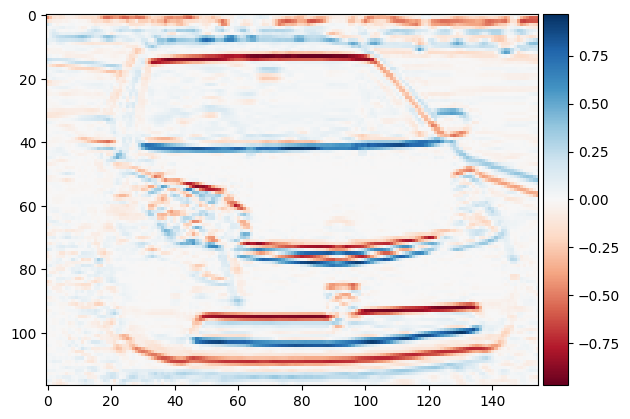

In [15]:
imshow(training_minor[9])

In [18]:
training_moderate = []
train_labels_moderate = []
for directory_path in glob.glob("/content/gdrive/MyDrive/data3a/training/*"):
    label = directory_path.split("-")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
        img = imread(img_path, as_gray=True)
        edges_prewitt = prewitt_h(img)
        training_moderate.append(edges_prewitt)
        train_labels_moderate.append(label)

training_moderate = np.array(training_moderate)
train_labels_moderate = np.array(train_labels_moderate)

moderate
severe
minor


<ipython-input-18-5d861d25cf19>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training_moderate = np.array(training_moderate)


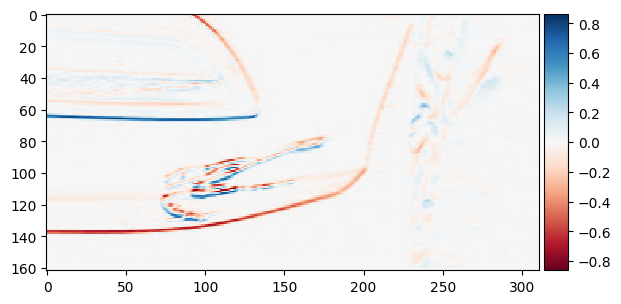

In [19]:
imshow(training_moderate[0])


In [23]:
training_severe = []
train_labels_severe = []
for directory_path in glob.glob("/content/gdrive/MyDrive/data3a/training/*"):
    label = directory_path.split("-")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = imread(img_path, as_gray=True)
        edges_prewitt = prewitt_h(img)
        training_severe.append(edges_prewitt)
        train_labels_severe.append(label)

training_severe = np.array(training_severe)
train_labels_severe = np.array(train_labels_severe)

moderate
severe
minor


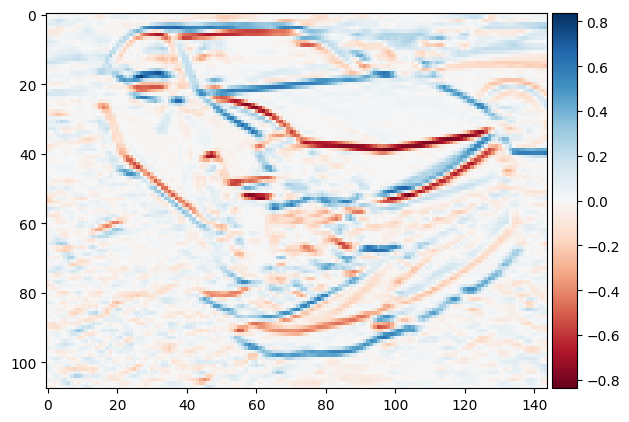

In [24]:
imshow(training_severe[1])


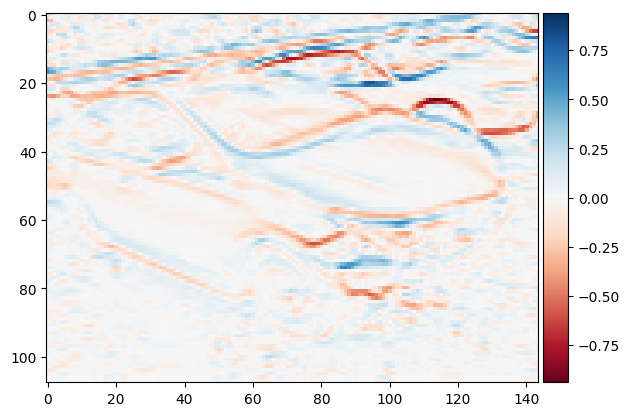

In [25]:
imshow(training_severe[8])


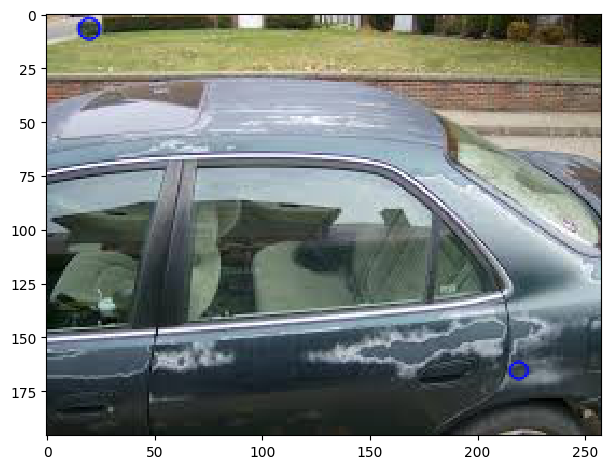

In [26]:
im = imread('/content/gdrive/MyDrive/data3a/validation/01-minor/0002.JPEG')
blob = cv2.SimpleBlobDetector_create()
key = blob.detect(im)
display = cv2.drawKeypoints(im, key, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

imshow(display)

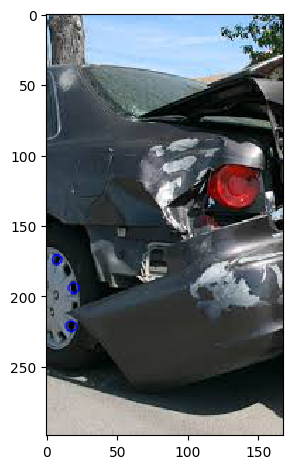

In [30]:
im = imread('/content/gdrive/MyDrive/data3a/training/03-severe/0002.JPEG')
blob = cv2.SimpleBlobDetector_create()
key = blob.detect(im)
display = cv2.drawKeypoints(im, key, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

imshow(display)

In [31]:
#Blobs might not be very useful, edge detection is better. 